##### Copyright 2018 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 텐서플로 2.0 시작하기: 초보자용

이 문서는 [구글 코랩](https://colab.research.google.com/notebooks/welcome.ipynb)(Colaboratory) 노트북 파일입니다. 파이썬 프로그램을 브라우저에서 직접 실행할 수 있기 때문에 텐서플로를 배우고 사용하기 좋은 도구입니다:

1. 파이썬 런타임(runtime)에 연결하세요: 메뉴 막대의 오른쪽 상단에서 *CONNECT*를 선택하세요.
2. 노트북의 모든 코드 셀(cell)을 실행하세요: *Runtime* > *Run all*을 선택하세요.

더 많은 예제와 자세한 안내는 [텐서플로 튜토리얼](https://www.tensorflow.org/tutorials/)을 참고하세요.

먼저 프로그램에 텐서플로 라이브러리를 임포트합니다:

In [1]:
import tensorflow as tf

[MNIST 데이터셋](http://yann.lecun.com/exdb/mnist/)을 로드하여 준비합니다. 샘플 값을 정수에서 부동소수로 변환합니다:

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

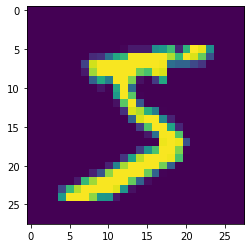

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.show()


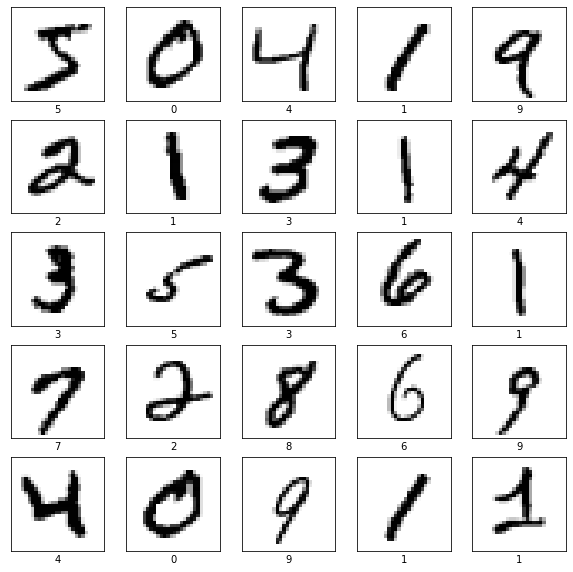

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

층을 차례대로 쌓아 `tf.keras.Sequential` 모델을 만듭니다. 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택합니다:

In [6]:
import time
def model_tune(x_train, y_train, nepoch, LR, batchsize, nlayers, nhidden, DOR):

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28), name = 'input'))
  for i in range(nlayers):
    model.add(tf.keras.layers.Dense(nhidden, activation='relu', name = 'hidden'+str(i)))
    model.add(tf.keras.layers.Dropout(DOR))
  model.add(tf.keras.layers.Dense(10, activation='softmax', name = 'output'))

  print(model.summary())
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  st = time.time()
  hist = model.fit(x_train, y_train, batch_size = batchsize, epochs=nepoch, validation_split= 0.2)
  return(model, hist, time.time()-st)

In [7]:


LRs = [0.1, 0.001, 0.0001]
batchsizes = [32, 128, 512]
nlayers = [1,2]
nhiddens = [32, 128, 256]
DORs = [0.2, 0.3, 0.4]
results = []

# for p in LRs:
#   model, hist, elapsed = model_tune(x_train, y_train, 5, p, 32, 1, 32, 0.2)
#   results.append((str(p), hist.history['val_accuracy'][-1], elapsed))

# results =list(zip(*results))
# model.evaluate(x_test,  y_test, verbose=2)

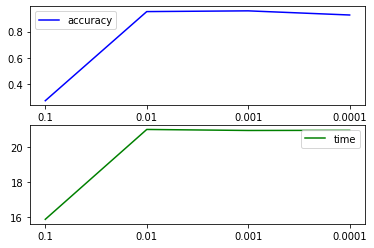

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1)

axs[0].plot(results[0], results[1], 'b', label='accuracy')
axs[0].legend(loc='upper left')
axs[1].plot(results[0], results[2], 'g', label='time')
axs[1].legend(loc='upper right')



# fig, acc_ax = plt.subplots()
# acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
# acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
# acc_ax.set_ylabel('accuracy')
# acc_ax.legend(loc='upper right')

plt.show()

In [8]:
import pandas as pd
import io
# x=pd.read_clipboard()
# x
x='''
"A","B","C","D","E"
"3","1","2","2","3"
"3","3","1","1","1"
"2","1","2","1","3"
"1","1","1","2","2"
"2","1","2","3","1"
"2","2","1","2","2"
"1","3","2","2","3"
"1","1","1","1","1"
"2","3","1","2","1"
"2","2","1","3","3"
"3","2","2","2","1"
"1","2","2","3","1"
"2","3","2","1","2"
"3","2","2","1","2"
"1","3","2","3","2"
"1","2","1","1","3"
"3","3","1","3","3"
"3","1","1","3","2"
'''
doe = pd.read_table( io.StringIO(x), sep = ',')-1


In [ ]:
for i,params in doe.iterrows():
  print(params)
  model, hist, elapsed = model_tune(x_train, y_train, 5, LRs[params[0]], batchsizes[params[1]], nlayers[params[2]], nhiddens[params[3]], DORs[params[4]])
  results.append((i, hist.history['val_accuracy'][-1], elapsed))

A    2
B    0
C    1
D    1
E    2
Name: 0, dtype: int64
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
hidden0 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable par

In [ ]:
import numpy as np
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

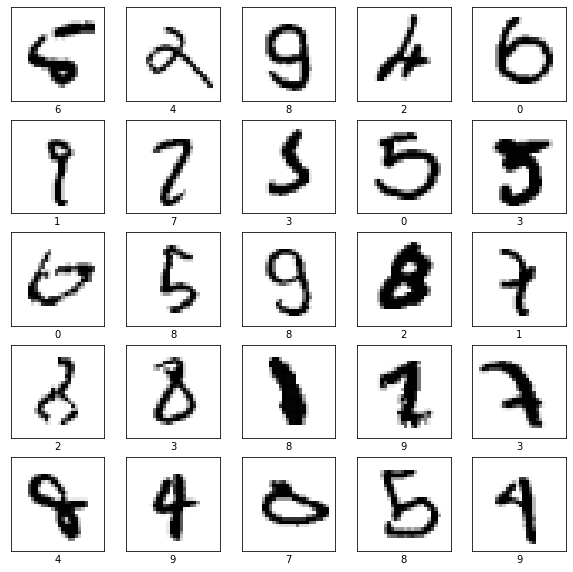

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
errors = np.where(y_pred!=y_test)[0]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[errors[i]], cmap=plt.cm.binary)
    plt.xlabel(y_pred[errors[i]])
plt.show()